## Name: Nitin Borse

## Task 6:-Prediction using Decision Tree Algorithm

## GRIP @ Spark Foundation

### Aim:-Create the Decision Tree classifier and visualize it graphically.

### Dateset:-https://bit.ly/3kXTdox

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
sns.set()

In [2]:
# Import Data
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

In [3]:
#it will give us all the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# To check the missing value in all Columns
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# checking the all columns in Dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# correlation between all columns
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


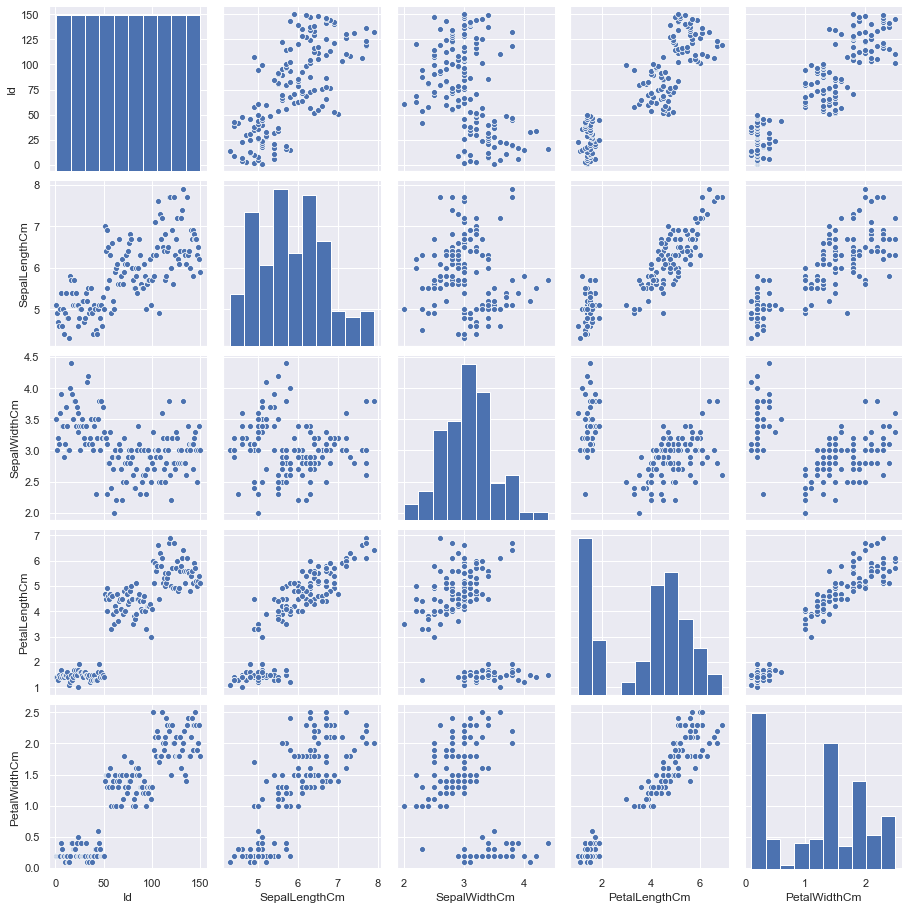

In [8]:
sns.pairplot(df)

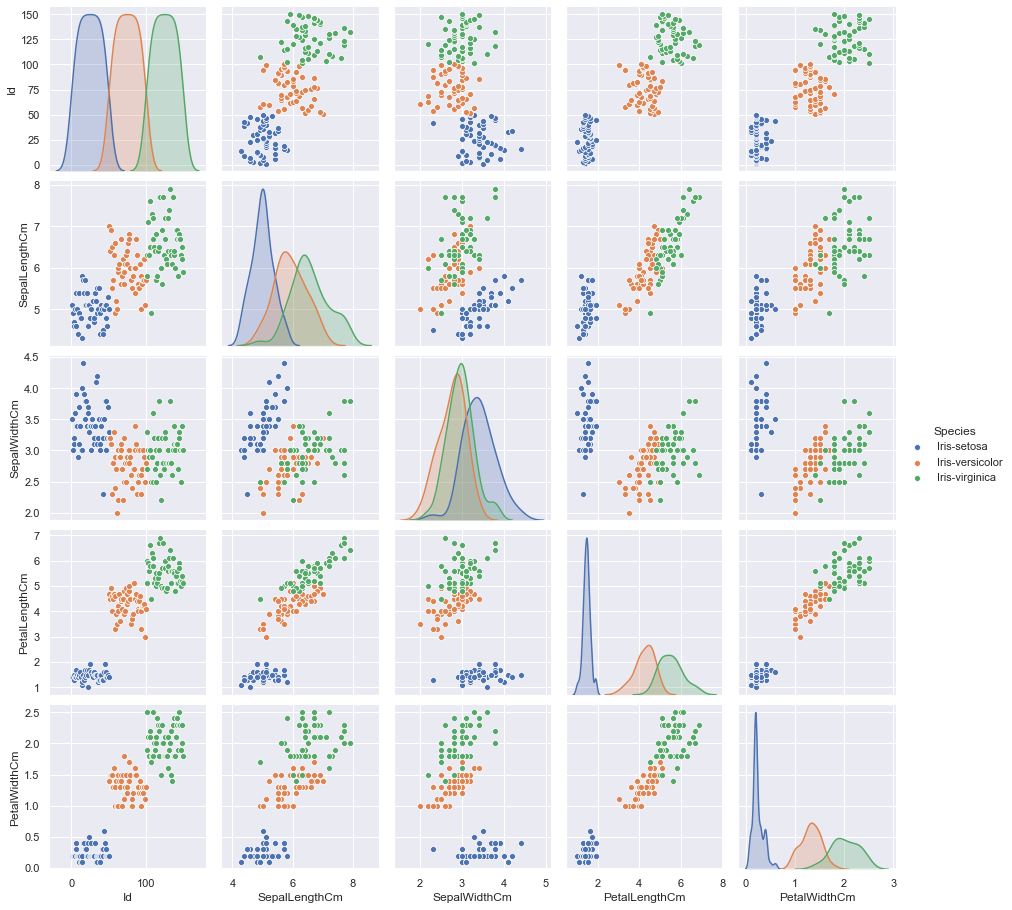

In [9]:
sns.pairplot(df,hue="Species")

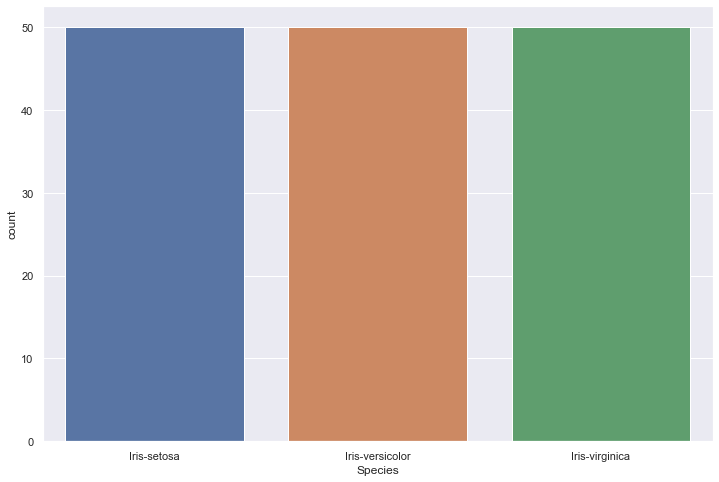

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=df)

In [11]:
# Convert the Species replace categorical value with a numeric value

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label_species"]=le.fit_transform(df["Species"])

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label_species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Splitting the dataset into training and testing data

In [14]:
x=df.drop(columns=["Species","label_species"])
y=df["label_species"]

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

## Fitting the model using Decision Tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 0, 1, 2])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
## Model Accuracy 
acc=accuracy_score(ytest,ypred)
acc

1.0

In [19]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



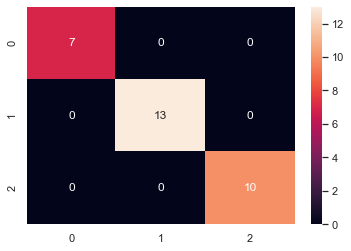

In [21]:
sns.heatmap(cm,annot=True)

## Conclusion